# Tests

Code for testing the sine wave generation, window generation and fft computation functions.

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Importing our existing flow funcs
import os
import sys
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
# Import modules
from sine_funcs import generate_sine_wave, window_signal, compute_fft

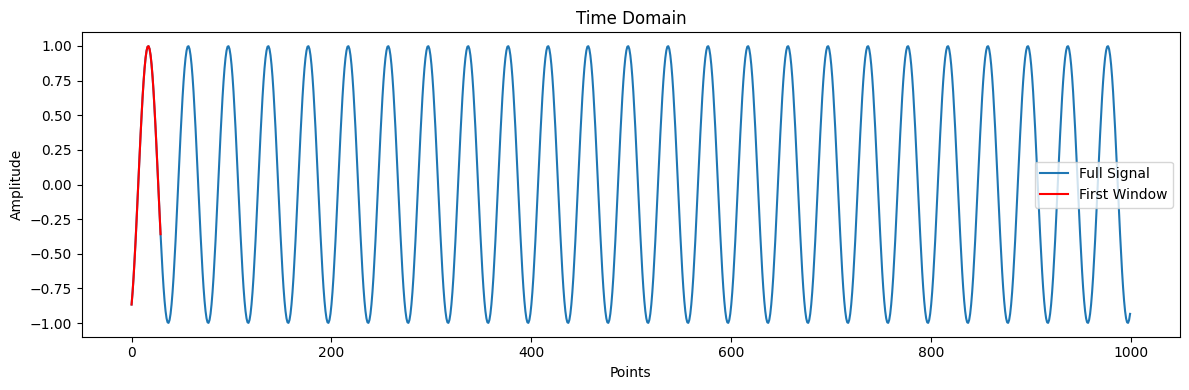

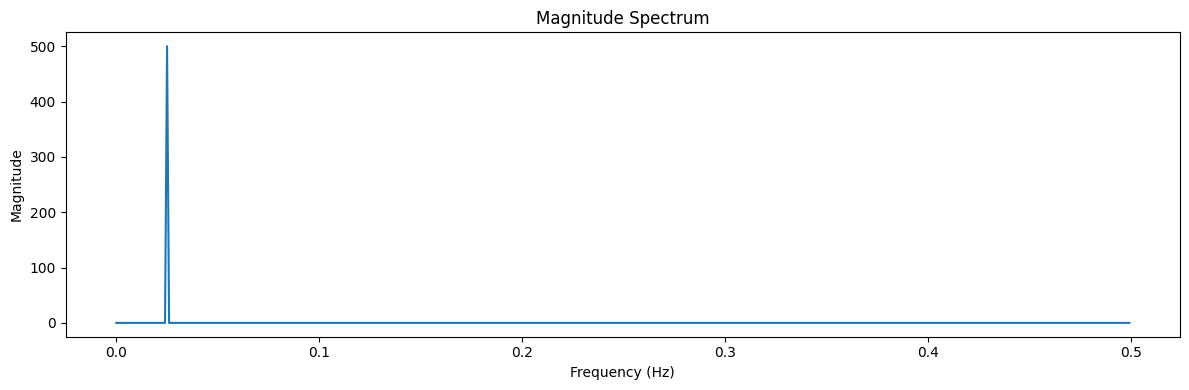

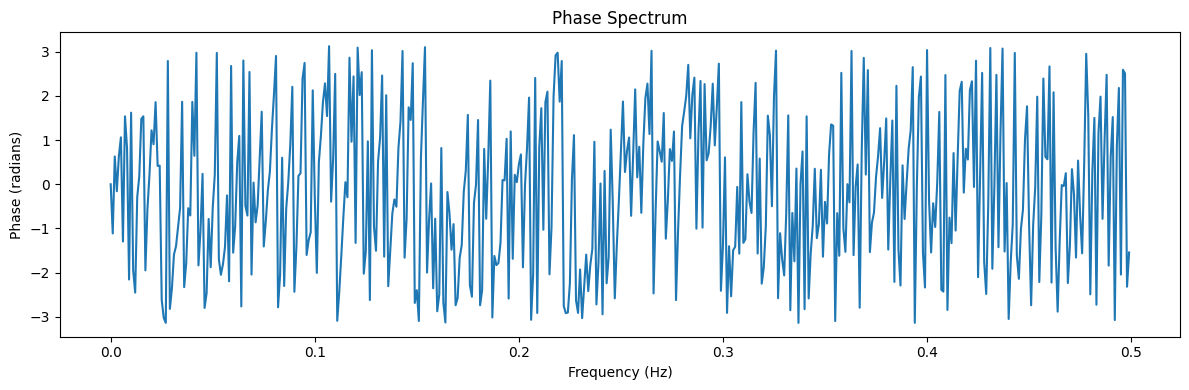

The dominant frequency is  0.025
With a phase of  -2.617993877991497
The original phase shift was  5.235987755982989


In [2]:
# Parameters with phase offset for demonstration
num_points = 1000
points_per_cycle = 40
window_size = 30
stride = 15
phase_offset = 5*np.pi/3  # 45 degree phase offset

signal = generate_sine_wave(num_points, points_per_cycle, phase_offset=phase_offset)
windows = window_signal(signal, window_size, stride)
first_window = windows[0].numpy()

# Compute theoretical values
theoretical_freq = 1/points_per_cycle
theoretical_phase = phase_offset

positive_freqs, positive_magnitude, positive_phase, peak_freq, peak_phase = compute_fft(signal.numpy())

# Time Domain Plot
plt.figure(figsize=(12, 4))
plt.plot(signal.numpy(), label='Full Signal')
plt.plot(range(window_size), first_window, 'r-', label='First Window')
plt.title("Time Domain")
plt.xlabel('Points')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# FFT Magnitude Plot
plt.figure(figsize=(12, 4))
plt.plot(positive_freqs, positive_magnitude)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(positive_freqs, positive_phase)
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.tight_layout()
plt.show()

print ("The dominant frequency is ", peak_freq)
print ("With a phase of ", peak_phase)
print ("The original phase shift was ", phase_offset)